In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

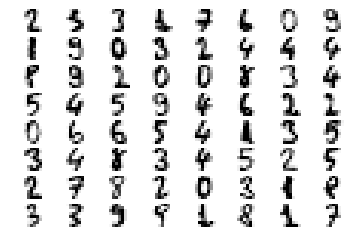

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.62344 stdev: 0.25788
Best fitness: 0.90971 - size: (2, 13) - species 6 - id 115
Average adjusted fitness: 0.455
Mean genetic distance 2.896, standard deviation 0.418
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 13.283 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.74060 stdev: 0.23990
Best fitness: 0.91713 - size: (3, 15) - species 10 - id 255
Average adjusted fitness: 0.669
Mean genetic distance 2.945, standard deviation 0.432
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 18.448 sec (15.866 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.80288 stdev: 0.18284
Best fitness: 0.95857 - size: (3, 13) - species 1 - id 528
Average adjusted fitness: 0.688
Mean genetic distance 2.952, standard deviation 0.470
Population of 203 members in 36 spec

Mean genetic distance 3.235, standard deviation 0.468
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 19.116 sec (17.287 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.57037 stdev: 0.21626
Best fitness: 0.86333 - size: (2, 13) - species 3 - id 162
Average adjusted fitness: 0.397
Mean genetic distance 2.893, standard deviation 0.452
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 14.881 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69105 stdev: 0.17712
Best fitness: 0.86333 - size: (2, 13) - species 2 - id 162
Average adjusted fitness: 0.507
Mean genetic distance 2.987, standard deviation 0.484
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 16.066 sec (15.474 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71789 stdev: 0.16235
Best fitness: 0.86333 

Population's average fitness: 0.59953 stdev: 0.09711
Best fitness: 0.79654 - size: (5, 20) - species 1 - id 985
Average adjusted fitness: 0.263
Mean genetic distance 3.107, standard deviation 0.504
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 17.554 sec (17.066 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.55023 stdev: 0.21183
Best fitness: 0.88435 - size: (2, 13) - species 2 - id 125
Average adjusted fitness: 0.415
Mean genetic distance 2.965, standard deviation 0.523
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 14.542 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68597 stdev: 0.17522
Best fitness: 0.92146 - size: (3, 14) - species 2 - id 351
Average adjusted fitness: 0.474
Mean genetic distance 3.052, standard deviation 0.538
Population of 199 members in 30 species
Total extinctions: 0
Generation time

Mean genetic distance 3.126, standard deviation 0.475
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 16.983 sec (16.005 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60969 stdev: 0.08986
Best fitness: 0.77242 - size: (4, 17) - species 36 - id 877
Average adjusted fitness: 0.228
Mean genetic distance 3.107, standard deviation 0.481
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 17.389 sec (16.235 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.54439 stdev: 0.14571
Best fitness: 0.76871 - size: (2, 13) - species 1 - id 178
Average adjusted fitness: 0.299
Mean genetic distance 2.920, standard deviation 0.490
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 14.437 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63013 stdev: 0.11871
Best fitness: 0.7841

Population's average fitness: 0.55534 stdev: 0.06219
Best fitness: 0.71738 - size: (2, 12) - species 1 - id 817
Average adjusted fitness: 0.192
Mean genetic distance 3.013, standard deviation 0.502
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 16.773 sec (15.687 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55981 stdev: 0.06589
Best fitness: 0.71738 - size: (2, 12) - species 1 - id 817
Average adjusted fitness: 0.250
Mean genetic distance 3.053, standard deviation 0.517
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 17.150 sec (15.931 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.59166 stdev: 0.20132
Best fitness: 0.83364 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.411
Mean genetic distance 2.893, standard deviation 0.461
Population of 201 members in 24 species
Total extinctions: 0

Mean genetic distance 3.114, standard deviation 0.472
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 15.995 sec (15.257 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61431 stdev: 0.08891
Best fitness: 0.77118 - size: (3, 16) - species 3 - id 525
Average adjusted fitness: 0.316
Mean genetic distance 3.096, standard deviation 0.472
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 17.151 sec (15.636 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62779 stdev: 0.09219
Best fitness: 0.78417 - size: (6, 22) - species 17 - id 966
Average adjusted fitness: 0.306
Mean genetic distance 3.073, standard deviation 0.493
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 16.734 sec (15.819 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53956 stdev: 0.14642
Bes

Population's average fitness: 0.55445 stdev: 0.07758
Best fitness: 0.73902 - size: (5, 19) - species 2 - id 669
Average adjusted fitness: 0.194
Mean genetic distance 3.117, standard deviation 0.465
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 17.241 sec (15.755 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57262 stdev: 0.08185
Best fitness: 0.75263 - size: (5, 18) - species 35 - id 745
Average adjusted fitness: 0.233
Mean genetic distance 3.133, standard deviation 0.469
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 18.539 sec (16.312 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57981 stdev: 0.08400
Best fitness: 0.75263 - size: (5, 18) - species 35 - id 745
Average adjusted fitness: 0.293
Mean genetic distance 3.151, standard deviation 0.473
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 17.974 sec (16.589 average)
running:

Mean genetic distance 2.990, standard deviation 0.461
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 15.776 sec (15.099 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57402 stdev: 0.08664
Best fitness: 0.76747 - size: (4, 16) - species 12 - id 595
Average adjusted fitness: 0.269
Mean genetic distance 2.968, standard deviation 0.481
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 16.561 sec (15.464 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57600 stdev: 0.09118
Best fitness: 0.76747 - size: (4, 16) - species 29 - id 595
Average adjusted fitness: 0.299
Mean genetic distance 2.991, standard deviation 0.475
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 17.120 sec (15.795 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58235 stdev: 0.08567
Best fitness: 0.76747 - size: (4, 16) - species 29 - id 595


Population's average fitness: 0.55523 stdev: 0.09053
Best fitness: 0.73222 - size: (3, 16) - species 15 - id 425
Average adjusted fitness: 0.187
Mean genetic distance 3.042, standard deviation 0.495
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 16.552 sec (15.861 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56521 stdev: 0.09297
Best fitness: 0.74954 - size: (2, 14) - species 8 - id 632
Average adjusted fitness: 0.224
Mean genetic distance 3.023, standard deviation 0.497
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 18.140 sec (16.431 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57017 stdev: 0.08942
Best fitness: 0.74954 - size: (2, 14) - species 8 - id 632
Average adjusted fitness: 0.234
Mean genetic distance 3.028, standard deviation 0.479
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 20.078 sec (17.160 average)

 ****** 

Mean genetic distance 2.941, standard deviation 0.510
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 20.348 sec (20.120 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58646 stdev: 0.08807
Best fitness: 0.73717 - size: (3, 16) - species 5 - id 476
Average adjusted fitness: 0.253
Mean genetic distance 2.995, standard deviation 0.492
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 20.040 sec (20.093 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58720 stdev: 0.09345
Best fitness: 0.73717 - size: (3, 16) - species 20 - id 476
Average adjusted fitness: 0.333
Mean genetic distance 3.015, standard deviation 0.500
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 20.163 sec (20.111 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59930 stdev: 0.08510
Best fitness: 0.73717 - size: (3, 16) - species 20 - id 476
A

Population's average fitness: 0.53385 stdev: 0.06143
Best fitness: 0.74644 - size: (3, 15) - species 6 - id 368
Average adjusted fitness: 0.139
Mean genetic distance 3.035, standard deviation 0.483
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 18.349 sec (17.873 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54170 stdev: 0.06989
Best fitness: 0.74644 - size: (3, 15) - species 27 - id 368
Average adjusted fitness: 0.170
Mean genetic distance 3.096, standard deviation 0.498
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 19.069 sec (18.271 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54592 stdev: 0.06944
Best fitness: 0.74644 - size: (3, 15) - species 27 - id 368
Average adjusted fitness: 0.177
Mean genetic distance 3.140, standard deviation 0.483
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 20.149 sec (18.741 average)

 ******

Mean genetic distance 2.871, standard deviation 0.476
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 16.245 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53831 stdev: 0.07274
Best fitness: 0.73408 - size: (2, 13) - species 6 - id 325
Average adjusted fitness: 0.177
Mean genetic distance 2.961, standard deviation 0.489
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 16.230 sec (16.237 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56130 stdev: 0.08497
Best fitness: 0.75943 - size: (2, 13) - species 1 - id 496
Average adjusted fitness: 0.263
Mean genetic distance 3.051, standard deviation 0.511
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 16.707 sec (16.394 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57396 stdev: 0.08120
Best fitness: 0.76252 - size: (4, 17) - species 7 - id 685
Average adjusted fit


 ****** Running generation 0 ****** 

Population's average fitness: 0.48344 stdev: 0.10038
Best fitness: 0.71429 - size: (2, 13) - species 4 - id 170
Average adjusted fitness: 0.211
Mean genetic distance 2.875, standard deviation 0.461
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 15.170 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54039 stdev: 0.09255
Best fitness: 0.75572 - size: (3, 14) - species 2 - id 264
Average adjusted fitness: 0.221
Mean genetic distance 2.997, standard deviation 0.487
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 16.206 sec (15.688 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56568 stdev: 0.09451
Best fitness: 0.75572 - size: (3, 14) - species 13 - id 264
Average adjusted fitness: 0.262
Mean genetic distance 3.068, standard deviation 0.504
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 16.592 sec (15.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50295 stdev: 0.06840
Best fitness: 0.70686 - size: (2, 13) - species 2 - id 84
Average adjusted fitness: 0.218
Mean genetic distance 2.828, standard deviation 0.444
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 19.495 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53589 stdev: 0.06631
Best fitness: 0.70686 - size: (2, 13) - species 2 - id 84
Average adjusted fitness: 0.191
Mean genetic distance 2.974, standard deviation 0.457
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 19.361 sec (19.428 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54988 stdev: 0.06770
Best fitness: 0.70748 - size: (3, 15) - species 3 - id 435
Average adjusted fitness: 0.196
Mean genetic distance 3.045, standard deviation 0.474
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 20.598 sec (19.818


 ****** Running generation 0 ****** 

Population's average fitness: 0.48000 stdev: 0.09331
Best fitness: 0.71923 - size: (2, 13) - species 3 - id 84
Average adjusted fitness: 0.188
Mean genetic distance 2.916, standard deviation 0.481
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 15.664 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53510 stdev: 0.10614
Best fitness: 0.72665 - size: (2, 14) - species 8 - id 309
Average adjusted fitness: 0.265
Mean genetic distance 3.027, standard deviation 0.504
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 16.711 sec (16.188 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55342 stdev: 0.09998
Best fitness: 0.75758 - size: (4, 17) - species 32 - id 537
Average adjusted fitness: 0.204
Mean genetic distance 3.099, standard deviation 0.495
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.233 sec (17.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.47130 stdev: 0.09535
Best fitness: 0.72047 - size: (2, 13) - species 1 - id 138
Average adjusted fitness: 0.315
Mean genetic distance 2.839, standard deviation 0.478
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 16.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54700 stdev: 0.09429
Best fitness: 0.72727 - size: (3, 14) - species 7 - id 278
Average adjusted fitness: 0.308
Mean genetic distance 2.945, standard deviation 0.494
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 17.672 sec (16.989 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57689 stdev: 0.09135
Best fitness: 0.80396 - size: (3, 16) - species 2 - id 526
Average adjusted fitness: 0.236
Mean genetic distance 3.018, standard deviation 0.489
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 18.072 sec (17.3

Population's average fitness: 0.47876 stdev: 0.15274
Best fitness: 0.78850 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.253
Mean genetic distance 2.950, standard deviation 0.479
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 15.500 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55993 stdev: 0.15676
Best fitness: 0.82066 - size: (2, 13) - species 4 - id 379
Average adjusted fitness: 0.364
Mean genetic distance 3.040, standard deviation 0.498
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 16.814 sec (16.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59900 stdev: 0.14641
Best fitness: 0.82066 - size: (2, 13) - species 4 - id 379
Average adjusted fitness: 0.374
Mean genetic distance 3.060, standard deviation 0.511
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 16.502 sec (16.272 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.53291 stdev: 0.08840
Best fitness: 0.75758 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.283
Mean genetic distance 2.981, standard deviation 0.530
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.286 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56865 stdev: 0.09441
Best fitness: 0.75758 - size: (2, 13) - species 10 - id 62
Average adjusted fitness: 0.274
Mean genetic distance 3.083, standard deviation 0.530
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 17.605 sec (17.946 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58109 stdev: 0.10227
Best fitness: 0.79716 - size: (3, 16) - species 9 - id 483
Average adjusted fitness: 0.262
Mean genetic distance 3.112, standard deviation 0.541
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 18.963 sec (18.28


 ****** Running generation 0 ****** 

Population's average fitness: 0.50057 stdev: 0.07215
Best fitness: 0.75819 - size: (2, 13) - species 1 - id 149
Average adjusted fitness: 0.225
Mean genetic distance 2.886, standard deviation 0.459
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 25.677 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53199 stdev: 0.08151
Best fitness: 0.77984 - size: (3, 15) - species 4 - id 375
Average adjusted fitness: 0.172
Mean genetic distance 2.938, standard deviation 0.473
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 24.087 sec (24.882 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55213 stdev: 0.08732
Best fitness: 0.77984 - size: (3, 15) - species 4 - id 375
Average adjusted fitness: 0.187
Mean genetic distance 2.966, standard deviation 0.487
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 32.721 sec (27.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.50299 stdev: 0.06847
Best fitness: 0.75077 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.245
Mean genetic distance 2.951, standard deviation 0.480
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 23.530 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53741 stdev: 0.07910
Best fitness: 0.75077 - size: (2, 13) - species 4 - id 159
Average adjusted fitness: 0.235
Mean genetic distance 3.024, standard deviation 0.486
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 22.991 sec (23.261 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55533 stdev: 0.07927
Best fitness: 0.79716 - size: (4, 17) - species 25 - id 463
Average adjusted fitness: 0.215
Mean genetic distance 3.057, standard deviation 0.486
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 23.499 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48640 stdev: 0.09739
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 162
Average adjusted fitness: 0.203
Mean genetic distance 2.936, standard deviation 0.502
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 19.681 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53239 stdev: 0.09453
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 162
Average adjusted fitness: 0.211
Mean genetic distance 2.960, standard deviation 0.504
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 21.589 sec (20.635 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55819 stdev: 0.09245
Best fitness: 0.77860 - size: (3, 14) - species 1 - id 535
Average adjusted fitness: 0.236
Mean genetic distance 3.030, standard deviation 0.526
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 21.271 sec (20.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.50595 stdev: 0.07961
Best fitness: 0.78602 - size: (2, 13) - species 5 - id 62
Average adjusted fitness: 0.230
Mean genetic distance 2.927, standard deviation 0.493
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 21.281 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55960 stdev: 0.08279
Best fitness: 0.78602 - size: (3, 15) - species 3 - id 217
Average adjusted fitness: 0.182
Mean genetic distance 3.078, standard deviation 0.484
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 24.401 sec (22.841 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57599 stdev: 0.10566
Best fitness: 0.83735 - size: (4, 17) - species 29 - id 423
Average adjusted fitness: 0.316
Mean genetic distance 3.083, standard deviation 0.498
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 24.745 sec (23.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.48057 stdev: 0.09981
Best fitness: 0.76252 - size: (2, 13) - species 4 - id 10
Average adjusted fitness: 0.258
Mean genetic distance 2.922, standard deviation 0.456
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54874 stdev: 0.10649
Best fitness: 0.77304 - size: (3, 15) - species 3 - id 338
Average adjusted fitness: 0.277
Mean genetic distance 3.029, standard deviation 0.457
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.858 sec (20.122 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56347 stdev: 0.11051
Best fitness: 0.78541 - size: (4, 17) - species 21 - id 415
Average adjusted fitness: 0.298
Mean genetic distance 3.017, standard deviation 0.472
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.398 sec (20.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.48121 stdev: 0.10260
Best fitness: 0.73408 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.208
Mean genetic distance 2.863, standard deviation 0.414
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 20.596 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55728 stdev: 0.10537
Best fitness: 0.75758 - size: (2, 13) - species 9 - id 242
Average adjusted fitness: 0.319
Mean genetic distance 2.925, standard deviation 0.444
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.755 sec (20.676 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57418 stdev: 0.10768
Best fitness: 0.75758 - size: (2, 13) - species 9 - id 242
Average adjusted fitness: 0.268
Mean genetic distance 2.934, standard deviation 0.449
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 22.803 sec (21.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.46011 stdev: 0.14894
Best fitness: 0.78169 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.240
Mean genetic distance 2.938, standard deviation 0.483
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.597 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55597 stdev: 0.15752
Best fitness: 0.80705 - size: (3, 14) - species 6 - id 308
Average adjusted fitness: 0.330
Mean genetic distance 3.031, standard deviation 0.482
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 20.832 sec (20.215 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59325 stdev: 0.15229
Best fitness: 0.80705 - size: (3, 14) - species 6 - id 308
Average adjusted fitness: 0.316
Mean genetic distance 3.134, standard deviation 0.481
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 22.905 sec (21.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50267 stdev: 0.06637
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 190
Average adjusted fitness: 0.217
Mean genetic distance 2.901, standard deviation 0.463
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.539 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52857 stdev: 0.06071
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 190
Average adjusted fitness: 0.150
Mean genetic distance 3.025, standard deviation 0.476
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 21.129 sec (20.334 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54793 stdev: 0.06424
Best fitness: 0.71119 - size: (4, 17) - species 11 - id 439
Average adjusted fitness: 0.144
Mean genetic distance 3.053, standard deviation 0.486
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 22.790 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48920 stdev: 0.09772
Best fitness: 0.74768 - size: (2, 13) - species 4 - id 97
Average adjusted fitness: 0.278
Mean genetic distance 2.990, standard deviation 0.512
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 20.596 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54112 stdev: 0.09475
Best fitness: 0.74768 - size: (2, 13) - species 8 - id 97
Average adjusted fitness: 0.213
Mean genetic distance 3.047, standard deviation 0.508
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.448 sec (21.022 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55808 stdev: 0.11058
Best fitness: 0.76623 - size: (3, 13) - species 1 - id 443
Average adjusted fitness: 0.333
Mean genetic distance 3.030, standard deviation 0.513
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 22.132 sec (21.392


 ****** Running generation 0 ****** 

Population's average fitness: 0.46230 stdev: 0.09260
Best fitness: 0.73531 - size: (2, 13) - species 8 - id 156
Average adjusted fitness: 0.224
Mean genetic distance 2.922, standard deviation 0.447
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.905 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53705 stdev: 0.09860
Best fitness: 0.73531 - size: (2, 13) - species 8 - id 156
Average adjusted fitness: 0.266
Mean genetic distance 2.987, standard deviation 0.448
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 22.204 sec (21.555 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57745 stdev: 0.09428
Best fitness: 0.73717 - size: (3, 15) - species 10 - id 445
Average adjusted fitness: 0.295
Mean genetic distance 3.039, standard deviation 0.454
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.988 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45824 stdev: 0.14924
Best fitness: 0.73593 - size: (2, 13) - species 2 - id 34
Average adjusted fitness: 0.217
Mean genetic distance 2.816, standard deviation 0.415
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 21.809 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57292 stdev: 0.14216
Best fitness: 0.79283 - size: (3, 15) - species 2 - id 296
Average adjusted fitness: 0.280
Mean genetic distance 2.893, standard deviation 0.445
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 23.228 sec (22.518 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60342 stdev: 0.13784
Best fitness: 0.79283 - size: (3, 15) - species 17 - id 296
Average adjusted fitness: 0.375
Mean genetic distance 2.918, standard deviation 0.479
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 25.427 sec (23.4

Mean genetic distance 3.079, standard deviation 0.485
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 27.100 sec (25.945 average)
running:115/511
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.49175 stdev: 0.09586
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 10
Average adjusted fitness: 0.154
Mean genetic distance 2.955, standard deviation 0.544
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 22.534 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54555 stdev: 0.10397
Best fitness: 0.78169 - size: (3, 15) - species 1 - id 373
Average adjusted fitness: 0.255
Mean genetic distance 3.078, standard deviation 0.500
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 23.678 sec (23.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55811 stdev: 0.10116
Best fitness: 0.78169 

Population's average fitness: 0.60635 stdev: 0.09233
Best fitness: 0.78479 - size: (3, 15) - species 5 - id 303
Average adjusted fitness: 0.325
Mean genetic distance 3.174, standard deviation 0.533
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 27.482 sec (25.636 average)
running:119/511
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.45208 stdev: 0.15142
Best fitness: 0.74954 - size: (2, 13) - species 1 - id 63
Average adjusted fitness: 0.248
Mean genetic distance 2.936, standard deviation 0.543
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 22.458 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58299 stdev: 0.14171
Best fitness: 0.77984 - size: (2, 14) - species 2 - id 275
Average adjusted fitness: 0.277
Mean genetic distance 3.056, standard deviation 0.522
Population of 201 members in 29 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.066, standard deviation 0.511
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 31.913 sec (29.231 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58990 stdev: 0.08443
Best fitness: 0.73779 - size: (4, 15) - species 20 - id 849
Average adjusted fitness: 0.232
Mean genetic distance 3.087, standard deviation 0.524
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 41.326 sec (31.247 average)
running:123/511
number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.45766 stdev: 0.15118
Best fitness: 0.74706 - size: (2, 13) - species 1 - id 16
Average adjusted fitness: 0.228
Mean genetic distance 2.933, standard deviation 0.493
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 31.241 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55994 stdev: 0.14985
Best fitness: 0.7612

Population's average fitness: 0.61632 stdev: 0.13022
Best fitness: 0.77304 - size: (4, 17) - species 19 - id 816
Average adjusted fitness: 0.337
Mean genetic distance 2.998, standard deviation 0.493
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 27.649 sec (25.238 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61167 stdev: 0.13708
Best fitness: 0.77304 - size: (4, 17) - species 19 - id 816
Average adjusted fitness: 0.302
Mean genetic distance 3.020, standard deviation 0.492
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 31.751 sec (26.323 average)
running:127/511
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.42602 stdev: 0.20974
Best fitness: 0.81138 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.230
Mean genetic distance 2.867, standard deviation 0.444
Population of 199 members in 22 species
Total extinction

Mean genetic distance 3.140, standard deviation 0.494
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 25.700 sec (26.427 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64190 stdev: 0.12352
Best fitness: 0.78046 - size: (3, 15) - species 1 - id 523
Average adjusted fitness: 0.338
Mean genetic distance 3.185, standard deviation 0.491
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 27.192 sec (26.580 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66187 stdev: 0.10821
Best fitness: 0.78046 - size: (3, 15) - species 1 - id 523
Average adjusted fitness: 0.352
Mean genetic distance 3.177, standard deviation 0.478
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 25.933 sec (26.472 average)
running:131/511
number of class1:641
number of class2:976

 ****** Running generation 0 ****** 

Population's average fitness: 0.51822 stdev: 0.08581
Best

Population's average fitness: 0.57856 stdev: 0.08068
Best fitness: 0.71676 - size: (4, 17) - species 1 - id 676
Average adjusted fitness: 0.210
Mean genetic distance 2.993, standard deviation 0.494
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 25.355 sec (24.018 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58457 stdev: 0.07843
Best fitness: 0.73036 - size: (4, 16) - species 17 - id 816
Average adjusted fitness: 0.243
Mean genetic distance 3.024, standard deviation 0.499
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 26.649 sec (24.544 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59975 stdev: 0.06799
Best fitness: 0.73036 - size: (4, 16) - species 17 - id 816
Average adjusted fitness: 0.222
Mean genetic distance 3.084, standard deviation 0.524
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 25.544 sec (24.711 average)
running:

Mean genetic distance 2.937, standard deviation 0.443
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 23.791 sec (22.615 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58751 stdev: 0.08945
Best fitness: 0.76809 - size: (3, 14) - species 20 - id 351
Average adjusted fitness: 0.241
Mean genetic distance 2.986, standard deviation 0.445
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 25.997 sec (23.461 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59886 stdev: 0.08515
Best fitness: 0.76809 - size: (3, 14) - species 20 - id 351
Average adjusted fitness: 0.267
Mean genetic distance 3.027, standard deviation 0.467
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 25.874 sec (23.944 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60019 stdev: 0.09147
Best fitness: 0.76809 - size: (3, 14) - species 20 - id 351


Population's average fitness: 0.55607 stdev: 0.06810
Best fitness: 0.74335 - size: (3, 15) - species 15 - id 378
Average adjusted fitness: 0.168
Mean genetic distance 2.979, standard deviation 0.475
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 24.347 sec (22.879 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55509 stdev: 0.07540
Best fitness: 0.74335 - size: (3, 15) - species 15 - id 378
Average adjusted fitness: 0.204
Mean genetic distance 3.035, standard deviation 0.469
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 24.525 sec (23.291 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57679 stdev: 0.07683
Best fitness: 0.76314 - size: (4, 16) - species 27 - id 840
Average adjusted fitness: 0.170
Mean genetic distance 3.054, standard deviation 0.488
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 25.910 sec (23.815 average)

 *****

Mean genetic distance 3.016, standard deviation 0.547
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 24.707 sec (26.300 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57937 stdev: 0.07615
Best fitness: 0.70872 - size: (3, 14) - species 14 - id 265
Average adjusted fitness: 0.194
Mean genetic distance 3.087, standard deviation 0.521
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 37.353 sec (29.984 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58563 stdev: 0.07669
Best fitness: 0.71243 - size: (3, 16) - species 8 - id 628
Average adjusted fitness: 0.264
Mean genetic distance 3.087, standard deviation 0.513
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 34.124 sec (31.019 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59522 stdev: 0.07125
Best fitness: 0.71243 - size: (3, 16) - species 8 - id 628
Av

Population's average fitness: 0.52830 stdev: 0.06133
Best fitness: 0.68646 - size: (3, 15) - species 3 - id 322
Average adjusted fitness: 0.211
Mean genetic distance 3.016, standard deviation 0.473
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 31.039 sec (33.651 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54108 stdev: 0.05973
Best fitness: 0.68646 - size: (3, 15) - species 9 - id 322
Average adjusted fitness: 0.187
Mean genetic distance 3.075, standard deviation 0.475
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 42.948 sec (36.750 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55105 stdev: 0.06139
Best fitness: 0.68646 - size: (3, 15) - species 9 - id 322
Average adjusted fitness: 0.182
Mean genetic distance 3.075, standard deviation 0.471
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 41.193 sec (37.861 average)

 ****** R

Mean genetic distance 2.947, standard deviation 0.496
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 25.371 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53523 stdev: 0.06216
Best fitness: 0.69202 - size: (3, 15) - species 8 - id 215
Average adjusted fitness: 0.196
Mean genetic distance 3.006, standard deviation 0.467
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 25.720 sec (25.546 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54038 stdev: 0.06670
Best fitness: 0.72604 - size: (4, 16) - species 3 - id 416
Average adjusted fitness: 0.162
Mean genetic distance 2.994, standard deviation 0.473
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 25.596 sec (25.562 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55661 stdev: 0.07175
Best fitness: 0.72604 - size: (4, 16) - species 3 - id 416
Average adjusted fit


 ****** Running generation 0 ****** 

Population's average fitness: 0.47673 stdev: 0.08072
Best fitness: 0.68275 - size: (2, 13) - species 4 - id 65
Average adjusted fitness: 0.203
Mean genetic distance 2.935, standard deviation 0.504
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 25.875 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52261 stdev: 0.09210
Best fitness: 0.71243 - size: (2, 14) - species 7 - id 207
Average adjusted fitness: 0.258
Mean genetic distance 3.039, standard deviation 0.510
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 25.515 sec (25.695 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55482 stdev: 0.08891
Best fitness: 0.76933 - size: (3, 14) - species 22 - id 392
Average adjusted fitness: 0.230
Mean genetic distance 3.063, standard deviation 0.491
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 33.653 sec (28.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.51106 stdev: 0.08920
Best fitness: 0.68275 - size: (2, 13) - species 6 - id 160
Average adjusted fitness: 0.208
Mean genetic distance 2.834, standard deviation 0.444
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 24.177 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55782 stdev: 0.07881
Best fitness: 0.70810 - size: (2, 14) - species 2 - id 248
Average adjusted fitness: 0.160
Mean genetic distance 2.964, standard deviation 0.473
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 24.698 sec (24.438 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57271 stdev: 0.07708
Best fitness: 0.70810 - size: (2, 14) - species 2 - id 248
Average adjusted fitness: 0.255
Mean genetic distance 2.957, standard deviation 0.481
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 27.545 sec (25.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49653 stdev: 0.05473
Best fitness: 0.66729 - size: (2, 13) - species 1 - id 44
Average adjusted fitness: 0.189
Mean genetic distance 2.855, standard deviation 0.481
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 24.499 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52326 stdev: 0.06232
Best fitness: 0.71058 - size: (3, 15) - species 1 - id 348
Average adjusted fitness: 0.172
Mean genetic distance 2.964, standard deviation 0.473
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 24.659 sec (24.579 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54335 stdev: 0.06711
Best fitness: 0.72913 - size: (4, 16) - species 4 - id 533
Average adjusted fitness: 0.215
Mean genetic distance 3.062, standard deviation 0.481
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 27.374 sec (25.51


 ****** Running generation 0 ****** 

Population's average fitness: 0.50680 stdev: 0.06754
Best fitness: 0.71614 - size: (2, 13) - species 3 - id 38
Average adjusted fitness: 0.180
Mean genetic distance 2.900, standard deviation 0.502
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 25.631 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54193 stdev: 0.08004
Best fitness: 0.75387 - size: (2, 14) - species 2 - id 309
Average adjusted fitness: 0.248
Mean genetic distance 2.975, standard deviation 0.505
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 24.669 sec (25.150 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56804 stdev: 0.08583
Best fitness: 0.82004 - size: (4, 17) - species 21 - id 530
Average adjusted fitness: 0.189
Mean genetic distance 2.998, standard deviation 0.504
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 27.513 sec (25.9

Mean genetic distance 3.040, standard deviation 0.546
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 44.201 sec (35.952 average)
running:174/511
number of class1:963
number of class2:654

 ****** Running generation 0 ****** 

Population's average fitness: 0.48154 stdev: 0.08800
Best fitness: 0.71429 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.199
Mean genetic distance 2.880, standard deviation 0.495
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 34.704 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52645 stdev: 0.09201
Best fitness: 0.72233 - size: (2, 13) - species 16 - id 358
Average adjusted fitness: 0.319
Mean genetic distance 3.002, standard deviation 0.489
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 34.349 sec (34.526 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55996 stdev: 0.08524
Best fitness: 0.79530 

Population's average fitness: 0.56376 stdev: 0.06113
Best fitness: 0.69635 - size: (4, 18) - species 13 - id 998
Average adjusted fitness: 0.215
Mean genetic distance 3.101, standard deviation 0.482
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 24.633 sec (23.430 average)
running:178/511
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.49821 stdev: 0.04836
Best fitness: 0.65986 - size: (2, 13) - species 4 - id 109
Average adjusted fitness: 0.156
Mean genetic distance 2.857, standard deviation 0.478
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.178 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52127 stdev: 0.04508
Best fitness: 0.67285 - size: (3, 15) - species 7 - id 365
Average adjusted fitness: 0.112
Mean genetic distance 2.942, standard deviation 0.473
Population of 199 members in 24 species
Total extinctions: 0
Generation ti

Mean genetic distance 3.075, standard deviation 0.502
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 31.214 sec (25.075 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57184 stdev: 0.08684
Best fitness: 0.74212 - size: (4, 19) - species 8 - id 901
Average adjusted fitness: 0.211
Mean genetic distance 3.091, standard deviation 0.505
Population of 210 members in 36 species
Total extinctions: 0
Generation time: 25.125 sec (25.083 average)
running:182/511
number of class1:964
number of class2:653

 ****** Running generation 0 ****** 

Population's average fitness: 0.48273 stdev: 0.08273
Best fitness: 0.67780 - size: (2, 13) - species 2 - id 111
Average adjusted fitness: 0.189
Mean genetic distance 2.881, standard deviation 0.490
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 27.028 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52916 stdev: 0.07976
Best fitness: 0.71923

Population's average fitness: 0.58516 stdev: 0.10120
Best fitness: 0.78169 - size: (2, 13) - species 26 - id 835
Average adjusted fitness: 0.270
Mean genetic distance 3.047, standard deviation 0.496
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 35.715 sec (26.331 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59481 stdev: 0.10340
Best fitness: 0.78169 - size: (2, 13) - species 26 - id 835
Average adjusted fitness: 0.282
Mean genetic distance 3.072, standard deviation 0.495
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 38.179 sec (28.306 average)
running:186/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.48124 stdev: 0.10046
Best fitness: 0.76067 - size: (2, 13) - species 4 - id 200
Average adjusted fitness: 0.195
Mean genetic distance 2.844, standard deviation 0.460
Population of 200 members in 22 species
Total extinction

Mean genetic distance 3.015, standard deviation 0.469
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 26.324 sec (24.494 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63598 stdev: 0.10928
Best fitness: 0.72542 - size: (3, 15) - species 7 - id 207
Average adjusted fitness: 0.331
Mean genetic distance 3.026, standard deviation 0.452
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 29.057 sec (25.406 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62916 stdev: 0.11449
Best fitness: 0.72665 - size: (4, 17) - species 25 - id 959
Average adjusted fitness: 0.305
Mean genetic distance 3.051, standard deviation 0.454
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 32.327 sec (26.560 average)
running:190/511
number of class1:1127
number of class2:490

 ****** Running generation 0 ****** 

Population's average fitness: 0.45558 stdev: 0.14351
Be

Population's average fitness: 0.60968 stdev: 0.11302
Best fitness: 0.80087 - size: (5, 19) - species 2 - id 691
Average adjusted fitness: 0.266
Mean genetic distance 3.055, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 26.010 sec (23.938 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61750 stdev: 0.12107
Best fitness: 0.80087 - size: (5, 19) - species 19 - id 691
Average adjusted fitness: 0.258
Mean genetic distance 3.138, standard deviation 0.520
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 27.295 sec (24.610 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62427 stdev: 0.11795
Best fitness: 0.80087 - size: (5, 19) - species 9 - id 691
Average adjusted fitness: 0.362
Mean genetic distance 3.153, standard deviation 0.518
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 30.139 sec (25.531 average)
running:1

Mean genetic distance 3.015, standard deviation 0.542
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 27.059 sec (26.372 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58262 stdev: 0.09069
Best fitness: 0.79716 - size: (2, 13) - species 2 - id 109
Average adjusted fitness: 0.203
Mean genetic distance 3.111, standard deviation 0.500
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 28.505 sec (26.906 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59767 stdev: 0.09156
Best fitness: 0.80025 - size: (3, 14) - species 2 - id 826
Average adjusted fitness: 0.212
Mean genetic distance 3.158, standard deviation 0.502
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 31.180 sec (27.760 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59975 stdev: 0.09135
Best fitness: 0.80025 - size: (3, 14) - species 2 - id 826
Ave

Population's average fitness: 0.56714 stdev: 0.09213
Best fitness: 0.81942 - size: (3, 13) - species 4 - id 493
Average adjusted fitness: 0.185
Mean genetic distance 2.982, standard deviation 0.504
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 26.525 sec (24.532 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59857 stdev: 0.09920
Best fitness: 0.81942 - size: (3, 13) - species 22 - id 493
Average adjusted fitness: 0.253
Mean genetic distance 2.985, standard deviation 0.492
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 28.402 sec (25.499 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60437 stdev: 0.10293
Best fitness: 0.81942 - size: (3, 13) - species 22 - id 493
Average adjusted fitness: 0.224
Mean genetic distance 3.017, standard deviation 0.486
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 31.937 sec (26.787 average)

 ******

Mean genetic distance 2.995, standard deviation 0.473
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 25.136 sec (22.309 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54302 stdev: 0.09536
Best fitness: 0.75696 - size: (3, 15) - species 6 - id 274
Average adjusted fitness: 0.219
Mean genetic distance 3.013, standard deviation 0.478
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 24.364 sec (22.994 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56605 stdev: 0.09163
Best fitness: 0.75696 - size: (3, 15) - species 32 - id 274
Average adjusted fitness: 0.233
Mean genetic distance 3.079, standard deviation 0.474
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.717 sec (22.925 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57535 stdev: 0.09933
Best fitness: 0.75696 - size: (3, 15) - species 32 - id 274
A

Population's average fitness: 0.54263 stdev: 0.08884
Best fitness: 0.80272 - size: (3, 14) - species 22 - id 366
Average adjusted fitness: 0.293
Mean genetic distance 2.938, standard deviation 0.480
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 20.362 sec (19.913 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56813 stdev: 0.09284
Best fitness: 0.80272 - size: (3, 14) - species 22 - id 366
Average adjusted fitness: 0.217
Mean genetic distance 2.943, standard deviation 0.499
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 21.164 sec (20.330 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57099 stdev: 0.10297
Best fitness: 0.80272 - size: (3, 14) - species 22 - id 366
Average adjusted fitness: 0.281
Mean genetic distance 2.979, standard deviation 0.506
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 22.276 sec (20.816 average)

 *****

Mean genetic distance 2.782, standard deviation 0.459
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 21.532 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52058 stdev: 0.11063
Best fitness: 0.77365 - size: (3, 14) - species 3 - id 259
Average adjusted fitness: 0.327
Mean genetic distance 2.910, standard deviation 0.470
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 24.881 sec (23.207 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55155 stdev: 0.10655
Best fitness: 0.77365 - size: (3, 14) - species 3 - id 259
Average adjusted fitness: 0.286
Mean genetic distance 2.964, standard deviation 0.443
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 24.252 sec (23.555 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58350 stdev: 0.10591
Best fitness: 0.82375 - size: (4, 18) - species 10 - id 653
Average adjusted fi


 ****** Running generation 0 ****** 

Population's average fitness: 0.48432 stdev: 0.10085
Best fitness: 0.72233 - size: (2, 13) - species 1 - id 138
Average adjusted fitness: 0.202
Mean genetic distance 2.846, standard deviation 0.451
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 25.060 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54006 stdev: 0.10514
Best fitness: 0.75201 - size: (3, 15) - species 5 - id 241
Average adjusted fitness: 0.303
Mean genetic distance 2.909, standard deviation 0.463
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 23.722 sec (24.391 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56386 stdev: 0.10662
Best fitness: 0.77737 - size: (4, 16) - species 1 - id 520
Average adjusted fitness: 0.291
Mean genetic distance 2.948, standard deviation 0.470
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 25.255 sec (24.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.46163 stdev: 0.15678
Best fitness: 0.76376 - size: (2, 13) - species 1 - id 52
Average adjusted fitness: 0.223
Mean genetic distance 2.910, standard deviation 0.480
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 21.854 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56100 stdev: 0.15227
Best fitness: 0.79406 - size: (3, 14) - species 4 - id 370
Average adjusted fitness: 0.287
Mean genetic distance 3.021, standard deviation 0.489
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 22.381 sec (22.118 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60169 stdev: 0.14512
Best fitness: 0.79963 - size: (3, 14) - species 21 - id 481
Average adjusted fitness: 0.324
Mean genetic distance 3.020, standard deviation 0.481
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.322 sec (21.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.50436 stdev: 0.05580
Best fitness: 0.69759 - size: (2, 13) - species 6 - id 196
Average adjusted fitness: 0.150
Mean genetic distance 2.833, standard deviation 0.479
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 22.127 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52916 stdev: 0.06985
Best fitness: 0.70006 - size: (2, 14) - species 6 - id 370
Average adjusted fitness: 0.207
Mean genetic distance 3.009, standard deviation 0.493
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 21.977 sec (22.052 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55003 stdev: 0.07308
Best fitness: 0.71861 - size: (3, 16) - species 6 - id 540
Average adjusted fitness: 0.189
Mean genetic distance 3.068, standard deviation 0.498
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 22.948 sec (22.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.47622 stdev: 0.08314
Best fitness: 0.68584 - size: (2, 13) - species 3 - id 13
Average adjusted fitness: 0.187
Mean genetic distance 2.915, standard deviation 0.543
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 20.692 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55279 stdev: 0.08547
Best fitness: 0.79839 - size: (2, 14) - species 7 - id 301
Average adjusted fitness: 0.274
Mean genetic distance 3.000, standard deviation 0.531
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 22.205 sec (21.449 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55661 stdev: 0.08976
Best fitness: 0.79839 - size: (2, 14) - species 15 - id 301
Average adjusted fitness: 0.238
Mean genetic distance 3.019, standard deviation 0.555
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 22.280 sec (21.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.47393 stdev: 0.09061
Best fitness: 0.68398 - size: (2, 13) - species 1 - id 160
Average adjusted fitness: 0.190
Mean genetic distance 2.972, standard deviation 0.480
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.551 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54066 stdev: 0.09808
Best fitness: 0.75696 - size: (3, 15) - species 30 - id 368
Average adjusted fitness: 0.252
Mean genetic distance 3.010, standard deviation 0.470
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.284 sec (21.918 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56010 stdev: 0.09526
Best fitness: 0.75696 - size: (3, 15) - species 30 - id 368
Average adjusted fitness: 0.315
Mean genetic distance 3.003, standard deviation 0.472
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 23.849 sec (22


 ****** Running generation 0 ****** 

Population's average fitness: 0.45487 stdev: 0.13463
Best fitness: 0.74026 - size: (2, 13) - species 2 - id 41
Average adjusted fitness: 0.231
Mean genetic distance 2.912, standard deviation 0.468
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.138 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57665 stdev: 0.12974
Best fitness: 0.74026 - size: (2, 13) - species 3 - id 41
Average adjusted fitness: 0.291
Mean genetic distance 3.031, standard deviation 0.493
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.638 sec (21.888 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58544 stdev: 0.13575
Best fitness: 0.75881 - size: (3, 15) - species 20 - id 533
Average adjusted fitness: 0.292
Mean genetic distance 3.102, standard deviation 0.514
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 24.102 sec (22.62


 ****** Running generation 0 ****** 

Population's average fitness: 0.47374 stdev: 0.08762
Best fitness: 0.66976 - size: (2, 13) - species 5 - id 113
Average adjusted fitness: 0.178
Mean genetic distance 2.921, standard deviation 0.492
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 21.792 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53363 stdev: 0.09178
Best fitness: 0.73160 - size: (2, 14) - species 4 - id 297
Average adjusted fitness: 0.202
Mean genetic distance 2.991, standard deviation 0.483
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 22.139 sec (21.966 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56042 stdev: 0.08718
Best fitness: 0.73160 - size: (2, 14) - species 4 - id 297
Average adjusted fitness: 0.224
Mean genetic distance 3.064, standard deviation 0.476
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.519 sec (21.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.47716 stdev: 0.14551
Best fitness: 0.76252 - size: (2, 13) - species 2 - id 172
Average adjusted fitness: 0.192
Mean genetic distance 2.796, standard deviation 0.453
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 22.485 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55028 stdev: 0.15169
Best fitness: 0.76252 - size: (2, 13) - species 2 - id 172
Average adjusted fitness: 0.296
Mean genetic distance 2.899, standard deviation 0.474
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 24.240 sec (23.363 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60717 stdev: 0.13055
Best fitness: 0.76871 - size: (2, 15) - species 8 - id 494
Average adjusted fitness: 0.323
Mean genetic distance 2.983, standard deviation 0.467
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 24.745 sec (23.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.46787 stdev: 0.15477
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.178
Mean genetic distance 2.891, standard deviation 0.478
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 18.167 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56374 stdev: 0.15220
Best fitness: 0.79406 - size: (3, 15) - species 8 - id 315
Average adjusted fitness: 0.308
Mean genetic distance 3.009, standard deviation 0.492
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.295 sec (18.231 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60732 stdev: 0.13156
Best fitness: 0.79406 - size: (3, 15) - species 8 - id 315
Average adjusted fitness: 0.318
Mean genetic distance 3.016, standard deviation 0.487
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 19.322 sec (18.59


 ****** Running generation 0 ****** 

Population's average fitness: 0.44248 stdev: 0.20301
Best fitness: 0.81942 - size: (2, 13) - species 2 - id 75
Average adjusted fitness: 0.231
Mean genetic distance 2.955, standard deviation 0.492
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 16.675 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59337 stdev: 0.19725
Best fitness: 0.82313 - size: (2, 14) - species 4 - id 302
Average adjusted fitness: 0.409
Mean genetic distance 3.008, standard deviation 0.510
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 17.748 sec (17.212 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62829 stdev: 0.19509
Best fitness: 0.82622 - size: (4, 16) - species 18 - id 499
Average adjusted fitness: 0.443
Mean genetic distance 2.994, standard deviation 0.503
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.672 sec (18.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.54230 stdev: 0.13900
Best fitness: 0.80829 - size: (2, 13) - species 3 - id 178
Average adjusted fitness: 0.282
Mean genetic distance 2.869, standard deviation 0.507
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 19.466 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62055 stdev: 0.11657
Best fitness: 0.80829 - size: (2, 13) - species 3 - id 178
Average adjusted fitness: 0.310
Mean genetic distance 2.995, standard deviation 0.514
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 20.367 sec (19.916 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63957 stdev: 0.12327
Best fitness: 0.80829 - size: (2, 13) - species 3 - id 178
Average adjusted fitness: 0.333
Mean genetic distance 3.050, standard deviation 0.527
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 20.617 sec (20.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.51749 stdev: 0.08176
Best fitness: 0.67285 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.244
Mean genetic distance 2.900, standard deviation 0.488
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.691 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55763 stdev: 0.07847
Best fitness: 0.79035 - size: (2, 12) - species 9 - id 285
Average adjusted fitness: 0.260
Mean genetic distance 2.987, standard deviation 0.476
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 20.556 sec (20.624 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55683 stdev: 0.08723
Best fitness: 0.79035 - size: (2, 12) - species 5 - id 285
Average adjusted fitness: 0.203
Mean genetic distance 3.058, standard deviation 0.482
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 21.277 sec (20.842


 ****** Running generation 0 ****** 

Population's average fitness: 0.53241 stdev: 0.08498
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 12
Average adjusted fitness: 0.248
Mean genetic distance 2.819, standard deviation 0.475
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 16.268 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56014 stdev: 0.08684
Best fitness: 0.73717 - size: (3, 15) - species 3 - id 297
Average adjusted fitness: 0.174
Mean genetic distance 3.042, standard deviation 0.496
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 19.743 sec (18.005 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56521 stdev: 0.08389
Best fitness: 0.73717 - size: (3, 15) - species 3 - id 297
Average adjusted fitness: 0.207
Mean genetic distance 3.052, standard deviation 0.455
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 24.814 sec (20.27


 ****** Running generation 0 ****** 

Population's average fitness: 0.49655 stdev: 0.05234
Best fitness: 0.62028 - size: (2, 13) - species 5 - id 15
Average adjusted fitness: 0.152
Mean genetic distance 2.929, standard deviation 0.478
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 20.493 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52058 stdev: 0.04513
Best fitness: 0.68275 - size: (2, 14) - species 12 - id 260
Average adjusted fitness: 0.144
Mean genetic distance 2.982, standard deviation 0.491
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 22.720 sec (21.606 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52895 stdev: 0.04902
Best fitness: 0.68275 - size: (2, 14) - species 12 - id 260
Average adjusted fitness: 0.127
Mean genetic distance 3.025, standard deviation 0.499
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 21.510 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51292 stdev: 0.08325
Best fitness: 0.71985 - size: (2, 13) - species 9 - id 102
Average adjusted fitness: 0.187
Mean genetic distance 2.889, standard deviation 0.451
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 22.372 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56229 stdev: 0.08254
Best fitness: 0.77056 - size: (2, 14) - species 7 - id 215
Average adjusted fitness: 0.215
Mean genetic distance 2.988, standard deviation 0.459
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 23.238 sec (22.805 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58532 stdev: 0.07251
Best fitness: 0.77056 - size: (2, 14) - species 7 - id 215
Average adjusted fitness: 0.235
Mean genetic distance 2.973, standard deviation 0.463
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 23.346 sec (22.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.50350 stdev: 0.05675
Best fitness: 0.65244 - size: (2, 13) - species 2 - id 73
Average adjusted fitness: 0.199
Mean genetic distance 2.894, standard deviation 0.479
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 23.604 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52837 stdev: 0.06085
Best fitness: 0.69264 - size: (2, 12) - species 19 - id 375
Average adjusted fitness: 0.165
Mean genetic distance 2.922, standard deviation 0.492
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 24.620 sec (24.112 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55102 stdev: 0.06352
Best fitness: 0.69264 - size: (2, 12) - species 19 - id 375
Average adjusted fitness: 0.187
Mean genetic distance 2.954, standard deviation 0.483
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 25.643 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49070 stdev: 0.05922
Best fitness: 0.69202 - size: (2, 13) - species 2 - id 113
Average adjusted fitness: 0.219
Mean genetic distance 2.830, standard deviation 0.483
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 24.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53260 stdev: 0.06462
Best fitness: 0.69511 - size: (3, 15) - species 6 - id 289
Average adjusted fitness: 0.183
Mean genetic distance 2.989, standard deviation 0.474
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 22.258 sec (23.573 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55311 stdev: 0.06424
Best fitness: 0.69511 - size: (3, 15) - species 12 - id 289
Average adjusted fitness: 0.252
Mean genetic distance 3.014, standard deviation 0.480
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.873 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48020 stdev: 0.07814
Best fitness: 0.66481 - size: (2, 13) - species 2 - id 158
Average adjusted fitness: 0.132
Mean genetic distance 2.910, standard deviation 0.464
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 20.592 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53780 stdev: 0.08333
Best fitness: 0.67965 - size: (3, 14) - species 8 - id 325
Average adjusted fitness: 0.226
Mean genetic distance 3.033, standard deviation 0.471
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 22.017 sec (21.305 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54808 stdev: 0.08187
Best fitness: 0.69140 - size: (3, 15) - species 31 - id 516
Average adjusted fitness: 0.215
Mean genetic distance 3.037, standard deviation 0.484
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 27.019 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.52629 stdev: 0.09506
Best fitness: 0.76994 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.259
Mean genetic distance 2.812, standard deviation 0.462
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 16.330 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57692 stdev: 0.08839
Best fitness: 0.76994 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.230
Mean genetic distance 2.884, standard deviation 0.474
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.700 sec (17.015 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58042 stdev: 0.09811
Best fitness: 0.76994 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.265
Mean genetic distance 2.990, standard deviation 0.501
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.135 sec (17.388 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.50538 stdev: 0.06187
Best fitness: 0.69264 - size: (2, 13) - species 5 - id 71
Average adjusted fitness: 0.188
Mean genetic distance 2.964, standard deviation 0.481
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 16.839 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53774 stdev: 0.07752
Best fitness: 0.74644 - size: (2, 14) - species 4 - id 289
Average adjusted fitness: 0.240
Mean genetic distance 3.013, standard deviation 0.496
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.205 sec (17.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55164 stdev: 0.07560
Best fitness: 0.74768 - size: (3, 15) - species 27 - id 513
Average adjusted fitness: 0.183
Mean genetic distance 3.026, standard deviation 0.497
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 18.463 sec (17.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.50246 stdev: 0.07180
Best fitness: 0.70130 - size: (2, 13) - species 1 - id 99
Average adjusted fitness: 0.235
Mean genetic distance 2.915, standard deviation 0.473
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 16.719 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54114 stdev: 0.07982
Best fitness: 0.74706 - size: (3, 14) - species 1 - id 374
Average adjusted fitness: 0.249
Mean genetic distance 2.989, standard deviation 0.477
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.970 sec (18.344 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56540 stdev: 0.08469
Best fitness: 0.74954 - size: (3, 15) - species 5 - id 529
Average adjusted fitness: 0.185
Mean genetic distance 2.993, standard deviation 0.467
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 19.595 sec (18.76

Population's average fitness: 0.47904 stdev: 0.09080
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.206
Mean genetic distance 2.909, standard deviation 0.472
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 16.639 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54128 stdev: 0.10166
Best fitness: 0.80087 - size: (3, 15) - species 1 - id 334
Average adjusted fitness: 0.281
Mean genetic distance 2.928, standard deviation 0.468
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 17.648 sec (17.143 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56543 stdev: 0.09873
Best fitness: 0.80087 - size: (3, 15) - species 22 - id 334
Average adjusted fitness: 0.236
Mean genetic distance 2.929, standard deviation 0.483
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.350 sec (17.546 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50634 stdev: 0.06314
Best fitness: 0.70625 - size: (2, 13) - species 5 - id 199
Average adjusted fitness: 0.214
Mean genetic distance 2.860, standard deviation 0.498
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 16.707 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52694 stdev: 0.06297
Best fitness: 0.71490 - size: (3, 15) - species 2 - id 348
Average adjusted fitness: 0.166
Mean genetic distance 2.997, standard deviation 0.528
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 17.473 sec (17.090 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54204 stdev: 0.06931
Best fitness: 0.71490 - size: (3, 15) - species 2 - id 348
Average adjusted fitness: 0.165
Mean genetic distance 3.035, standard deviation 0.495
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.832 sec (17.6


Population's average fitness: 0.48243 stdev: 0.09167
Best fitness: 0.72851 - size: (2, 13) - species 1 - id 104
Average adjusted fitness: 0.159
Mean genetic distance 2.890, standard deviation 0.501
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 14.033 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52858 stdev: 0.09941
Best fitness: 0.74026 - size: (2, 14) - species 1 - id 338
Average adjusted fitness: 0.262
Mean genetic distance 3.035, standard deviation 0.520
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 15.006 sec (14.520 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55493 stdev: 0.09816
Best fitness: 0.75325 - size: (3, 15) - species 1 - id 536
Average adjusted fitness: 0.270
Mean genetic distance 3.112, standard deviation 0.525
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 15.634 sec (14.891 average)

 ****** Running generatio


Population's average fitness: 0.47718 stdev: 0.10163
Best fitness: 0.77180 - size: (2, 13) - species 3 - id 26
Average adjusted fitness: 0.284
Mean genetic distance 2.905, standard deviation 0.467
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.456 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53442 stdev: 0.10332
Best fitness: 0.80396 - size: (3, 15) - species 7 - id 380
Average adjusted fitness: 0.259
Mean genetic distance 3.016, standard deviation 0.482
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 14.585 sec (14.020 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56230 stdev: 0.09867
Best fitness: 0.80829 - size: (3, 16) - species 3 - id 500
Average adjusted fitness: 0.209
Mean genetic distance 3.094, standard deviation 0.489
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 14.954 sec (14.332 average)

 ****** Running generation

Population's average fitness: 0.46474 stdev: 0.14316
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 18
Average adjusted fitness: 0.249
Mean genetic distance 2.846, standard deviation 0.451
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 13.467 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56783 stdev: 0.13721
Best fitness: 0.78046 - size: (2, 14) - species 3 - id 277
Average adjusted fitness: 0.356
Mean genetic distance 2.980, standard deviation 0.462
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.381 sec (13.924 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58949 stdev: 0.13792
Best fitness: 0.78046 - size: (2, 14) - species 3 - id 277
Average adjusted fitness: 0.314
Mean genetic distance 3.022, standard deviation 0.460
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 15.092 sec (14.314 average)

 ****** Running generation 

Population's average fitness: 0.52326 stdev: 0.08780
Best fitness: 0.74583 - size: (2, 13) - species 4 - id 24
Average adjusted fitness: 0.207
Mean genetic distance 2.882, standard deviation 0.467
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 13.673 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56536 stdev: 0.08607
Best fitness: 0.77922 - size: (3, 14) - species 4 - id 380
Average adjusted fitness: 0.255
Mean genetic distance 2.927, standard deviation 0.475
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.548 sec (14.110 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57292 stdev: 0.09340
Best fitness: 0.77922 - size: (3, 14) - species 4 - id 380
Average adjusted fitness: 0.279
Mean genetic distance 2.995, standard deviation 0.479
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 15.053 sec (14.424 average)

 ****** Running generation 

Population's average fitness: 0.50567 stdev: 0.06179
Best fitness: 0.65801 - size: (2, 13) - species 1 - id 184
Average adjusted fitness: 0.211
Mean genetic distance 2.977, standard deviation 0.502
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.254 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52969 stdev: 0.06221
Best fitness: 0.68089 - size: (3, 15) - species 1 - id 320
Average adjusted fitness: 0.226
Mean genetic distance 2.982, standard deviation 0.520
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.248 sec (14.251 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55595 stdev: 0.06032
Best fitness: 0.71058 - size: (3, 14) - species 4 - id 491
Average adjusted fitness: 0.125
Mean genetic distance 2.984, standard deviation 0.529
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 15.097 sec (14.533 average)

 ****** Running generation

Population's average fitness: 0.49909 stdev: 0.06106
Best fitness: 0.67347 - size: (2, 13) - species 5 - id 132
Average adjusted fitness: 0.237
Mean genetic distance 2.912, standard deviation 0.500
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.359 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53394 stdev: 0.07049
Best fitness: 0.70254 - size: (3, 13) - species 7 - id 285
Average adjusted fitness: 0.174
Mean genetic distance 3.018, standard deviation 0.508
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.380 sec (13.869 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54780 stdev: 0.07259
Best fitness: 0.70254 - size: (3, 13) - species 7 - id 285
Average adjusted fitness: 0.226
Mean genetic distance 3.064, standard deviation 0.514
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.856 sec (14.198 average)

 ****** Running generation

Population's average fitness: 0.49935 stdev: 0.08385
Best fitness: 0.66543 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.149
Mean genetic distance 2.874, standard deviation 0.505
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.578 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54447 stdev: 0.07767
Best fitness: 0.67038 - size: (3, 15) - species 22 - id 369
Average adjusted fitness: 0.207
Mean genetic distance 3.020, standard deviation 0.509
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 14.344 sec (13.961 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54772 stdev: 0.08344
Best fitness: 0.67471 - size: (4, 16) - species 12 - id 406
Average adjusted fitness: 0.209
Mean genetic distance 3.094, standard deviation 0.486
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 14.982 sec (14.301 average)

 ****** Running generatio


Population's average fitness: 0.50380 stdev: 0.06973
Best fitness: 0.81509 - size: (2, 13) - species 1 - id 109
Average adjusted fitness: 0.184
Mean genetic distance 2.906, standard deviation 0.514
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.676 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54210 stdev: 0.08767
Best fitness: 0.82746 - size: (2, 14) - species 23 - id 368
Average adjusted fitness: 0.207
Mean genetic distance 2.957, standard deviation 0.477
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 14.543 sec (14.109 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57733 stdev: 0.10049
Best fitness: 0.84168 - size: (3, 16) - species 23 - id 532
Average adjusted fitness: 0.197
Mean genetic distance 2.965, standard deviation 0.476
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 15.087 sec (14.435 average)

 ****** Running generat


Population's average fitness: 0.47935 stdev: 0.09395
Best fitness: 0.72913 - size: (2, 13) - species 3 - id 65
Average adjusted fitness: 0.170
Mean genetic distance 2.971, standard deviation 0.480
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 13.691 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54459 stdev: 0.09595
Best fitness: 0.73902 - size: (2, 13) - species 16 - id 319
Average adjusted fitness: 0.206
Mean genetic distance 3.032, standard deviation 0.501
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 14.573 sec (14.132 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56058 stdev: 0.10076
Best fitness: 0.73902 - size: (2, 13) - species 16 - id 319
Average adjusted fitness: 0.272
Mean genetic distance 3.066, standard deviation 0.492
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 15.336 sec (14.533 average)

 ****** Running generati

Population's average fitness: 0.48387 stdev: 0.09554
Best fitness: 0.73222 - size: (2, 13) - species 3 - id 142
Average adjusted fitness: 0.202
Mean genetic distance 2.890, standard deviation 0.474
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.580 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54544 stdev: 0.09641
Best fitness: 0.77427 - size: (3, 15) - species 17 - id 293
Average adjusted fitness: 0.224
Mean genetic distance 2.937, standard deviation 0.476
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.619 sec (14.100 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56588 stdev: 0.09801
Best fitness: 0.77427 - size: (3, 15) - species 9 - id 293
Average adjusted fitness: 0.209
Mean genetic distance 2.932, standard deviation 0.493
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 15.197 sec (14.466 average)

 ****** Running generatio


Population's average fitness: 0.45360 stdev: 0.14647
Best fitness: 0.72356 - size: (2, 13) - species 4 - id 14
Average adjusted fitness: 0.232
Mean genetic distance 2.935, standard deviation 0.498
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.519 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56496 stdev: 0.13926
Best fitness: 0.73098 - size: (2, 13) - species 16 - id 290
Average adjusted fitness: 0.257
Mean genetic distance 3.014, standard deviation 0.490
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.524 sec (14.021 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59847 stdev: 0.12791
Best fitness: 0.74026 - size: (2, 14) - species 20 - id 518
Average adjusted fitness: 0.302
Mean genetic distance 3.033, standard deviation 0.519
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 15.223 sec (14.422 average)

 ****** Running generati

Population's average fitness: 0.50401 stdev: 0.06013
Best fitness: 0.64997 - size: (2, 13) - species 1 - id 117
Average adjusted fitness: 0.208
Mean genetic distance 2.913, standard deviation 0.487
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.341 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53408 stdev: 0.06162
Best fitness: 0.69017 - size: (3, 15) - species 1 - id 335
Average adjusted fitness: 0.186
Mean genetic distance 2.971, standard deviation 0.499
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.384 sec (13.863 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55466 stdev: 0.06239
Best fitness: 0.70068 - size: (2, 14) - species 1 - id 538
Average adjusted fitness: 0.190
Mean genetic distance 2.984, standard deviation 0.502
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 14.810 sec (14.179 average)

 ****** Running generation

Population's average fitness: 0.47654 stdev: 0.08451
Best fitness: 0.70192 - size: (2, 13) - species 2 - id 187
Average adjusted fitness: 0.173
Mean genetic distance 2.913, standard deviation 0.473
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.636 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52901 stdev: 0.09144
Best fitness: 0.74026 - size: (3, 14) - species 5 - id 287
Average adjusted fitness: 0.250
Mean genetic distance 3.053, standard deviation 0.509
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.473 sec (14.054 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56412 stdev: 0.08349
Best fitness: 0.74026 - size: (3, 14) - species 16 - id 287
Average adjusted fitness: 0.181
Mean genetic distance 3.104, standard deviation 0.527
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 15.502 sec (14.537 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.48563 stdev: 0.09699
Best fitness: 0.72294 - size: (2, 13) - species 3 - id 132
Average adjusted fitness: 0.197
Mean genetic distance 2.860, standard deviation 0.453
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.837 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54276 stdev: 0.09488
Best fitness: 0.72294 - size: (2, 13) - species 3 - id 132
Average adjusted fitness: 0.242
Mean genetic distance 2.984, standard deviation 0.469
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 14.447 sec (14.642 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57935 stdev: 0.08463
Best fitness: 0.73098 - size: (2, 12) - species 27 - id 466
Average adjusted fitness: 0.244
Mean genetic distance 2.999, standard deviation 0.470
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.035 sec (14.

Population's average fitness: 0.46801 stdev: 0.14394
Best fitness: 0.77180 - size: (2, 13) - species 5 - id 172
Average adjusted fitness: 0.203
Mean genetic distance 2.902, standard deviation 0.512
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.534 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55993 stdev: 0.14383
Best fitness: 0.77180 - size: (2, 13) - species 2 - id 172
Average adjusted fitness: 0.316
Mean genetic distance 3.054, standard deviation 0.481
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 14.415 sec (13.974 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61466 stdev: 0.11864
Best fitness: 0.77180 - size: (2, 13) - species 19 - id 172
Average adjusted fitness: 0.334
Mean genetic distance 3.121, standard deviation 0.495
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 15.108 sec (14.352 average)

 ****** Running generatio

Population's average fitness: 0.48943 stdev: 0.08901
Best fitness: 0.72542 - size: (2, 13) - species 3 - id 117
Average adjusted fitness: 0.143
Mean genetic distance 2.907, standard deviation 0.445
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 13.476 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53751 stdev: 0.09204
Best fitness: 0.74892 - size: (3, 15) - species 7 - id 355
Average adjusted fitness: 0.162
Mean genetic distance 2.940, standard deviation 0.465
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.243 sec (13.860 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55794 stdev: 0.08902
Best fitness: 0.74892 - size: (3, 15) - species 22 - id 355
Average adjusted fitness: 0.187
Mean genetic distance 3.006, standard deviation 0.493
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 15.013 sec (14.244 average)

 ****** Running generatio

Population's average fitness: 0.45613 stdev: 0.13455
Best fitness: 0.73655 - size: (2, 13) - species 5 - id 139
Average adjusted fitness: 0.192
Mean genetic distance 2.891, standard deviation 0.461
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.455 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57053 stdev: 0.14230
Best fitness: 0.78046 - size: (2, 14) - species 1 - id 249
Average adjusted fitness: 0.286
Mean genetic distance 2.966, standard deviation 0.478
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.944 sec (14.199 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60888 stdev: 0.13295
Best fitness: 0.78046 - size: (2, 14) - species 1 - id 249
Average adjusted fitness: 0.325
Mean genetic distance 3.007, standard deviation 0.493
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 15.106 sec (14.501 average)

 ****** Running generation

Population's average fitness: 0.45644 stdev: 0.14882
Best fitness: 0.73222 - size: (2, 13) - species 2 - id 147
Average adjusted fitness: 0.268
Mean genetic distance 2.850, standard deviation 0.446
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.455 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56268 stdev: 0.14303
Best fitness: 0.75325 - size: (3, 15) - species 21 - id 381
Average adjusted fitness: 0.348
Mean genetic distance 2.987, standard deviation 0.478
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.394 sec (13.924 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59537 stdev: 0.13896
Best fitness: 0.77427 - size: (4, 15) - species 3 - id 439
Average adjusted fitness: 0.309
Mean genetic distance 2.968, standard deviation 0.500
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 15.649 sec (14.499 average)

 ****** Running generatio

Population's average fitness: 0.44421 stdev: 0.19736
Best fitness: 0.81818 - size: (2, 13) - species 7 - id 183
Average adjusted fitness: 0.280
Mean genetic distance 2.829, standard deviation 0.442
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.601 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56647 stdev: 0.20497
Best fitness: 0.81818 - size: (2, 13) - species 1 - id 183
Average adjusted fitness: 0.429
Mean genetic distance 2.909, standard deviation 0.466
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 14.365 sec (13.983 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62139 stdev: 0.19543
Best fitness: 0.81818 - size: (2, 13) - species 3 - id 183
Average adjusted fitness: 0.424
Mean genetic distance 2.965, standard deviation 0.463
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 14.884 sec (14.283 average)

 ****** Running generation

Population's average fitness: 0.51577 stdev: 0.08558
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.215
Mean genetic distance 2.910, standard deviation 0.501
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.636 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54913 stdev: 0.08110
Best fitness: 0.69573 - size: (3, 14) - species 4 - id 359
Average adjusted fitness: 0.270
Mean genetic distance 2.961, standard deviation 0.494
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.404 sec (14.020 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57374 stdev: 0.07694
Best fitness: 0.71058 - size: (3, 15) - species 27 - id 523
Average adjusted fitness: 0.221
Mean genetic distance 3.064, standard deviation 0.483
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 15.438 sec (14.493 average)

 ****** Running generatio

Population's average fitness: 0.50532 stdev: 0.04508
Best fitness: 0.64873 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.105
Mean genetic distance 2.944, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.694 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51734 stdev: 0.05253
Best fitness: 0.71429 - size: (3, 15) - species 17 - id 300
Average adjusted fitness: 0.243
Mean genetic distance 3.038, standard deviation 0.502
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 14.704 sec (14.199 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53306 stdev: 0.05322
Best fitness: 0.71429 - size: (3, 15) - species 17 - id 300
Average adjusted fitness: 0.192
Mean genetic distance 3.047, standard deviation 0.495
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 15.099 sec (14.499 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.49460 stdev: 0.05408
Best fitness: 0.68151 - size: (2, 13) - species 9 - id 193
Average adjusted fitness: 0.203
Mean genetic distance 2.954, standard deviation 0.494
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.799 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52785 stdev: 0.05858
Best fitness: 0.69017 - size: (2, 14) - species 5 - id 310
Average adjusted fitness: 0.172
Mean genetic distance 3.059, standard deviation 0.496
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.920 sec (14.360 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53888 stdev: 0.06456
Best fitness: 0.69017 - size: (2, 14) - species 5 - id 310
Average adjusted fitness: 0.193
Mean genetic distance 3.035, standard deviation 0.469
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 15.121 sec (14.6

Population's average fitness: 0.47486 stdev: 0.07943
Best fitness: 0.62214 - size: (2, 13) - species 1 - id 66
Average adjusted fitness: 0.160
Mean genetic distance 2.961, standard deviation 0.518
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.764 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53250 stdev: 0.07585
Best fitness: 0.64317 - size: (3, 15) - species 2 - id 322
Average adjusted fitness: 0.219
Mean genetic distance 3.081, standard deviation 0.505
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.540 sec (14.152 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54693 stdev: 0.07486
Best fitness: 0.66419 - size: (4, 16) - species 5 - id 532
Average adjusted fitness: 0.230
Mean genetic distance 3.113, standard deviation 0.493
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 15.252 sec (14.518 average)

 ****** Running generation 

Population's average fitness: 0.49955 stdev: 0.05550
Best fitness: 0.69944 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.215
Mean genetic distance 2.863, standard deviation 0.487
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.813 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52796 stdev: 0.05362
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 369
Average adjusted fitness: 0.126
Mean genetic distance 3.010, standard deviation 0.525
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 14.395 sec (14.104 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54389 stdev: 0.06377
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 369
Average adjusted fitness: 0.160
Mean genetic distance 3.081, standard deviation 0.528
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 15.749 sec (14.652 average)

 ****** Running generation 

Population's average fitness: 0.47894 stdev: 0.08497
Best fitness: 0.66419 - size: (2, 13) - species 4 - id 26
Average adjusted fitness: 0.197
Mean genetic distance 2.889, standard deviation 0.480
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.948 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53184 stdev: 0.08449
Best fitness: 0.69326 - size: (2, 13) - species 19 - id 320
Average adjusted fitness: 0.190
Mean genetic distance 2.982, standard deviation 0.488
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 14.838 sec (14.393 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55781 stdev: 0.07815
Best fitness: 0.69326 - size: (2, 13) - species 19 - id 320
Average adjusted fitness: 0.225
Mean genetic distance 3.030, standard deviation 0.487
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 15.522 sec (14.770 average)

 ****** Running generatio

Population's average fitness: 0.48007 stdev: 0.09008
Best fitness: 0.71367 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.184
Mean genetic distance 2.808, standard deviation 0.465
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.705 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55658 stdev: 0.08496
Best fitness: 0.71367 - size: (2, 13) - species 3 - id 105
Average adjusted fitness: 0.187
Mean genetic distance 2.911, standard deviation 0.472
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 14.664 sec (14.184 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57047 stdev: 0.08639
Best fitness: 0.71614 - size: (3, 15) - species 3 - id 547
Average adjusted fitness: 0.204
Mean genetic distance 2.980, standard deviation 0.481
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.033 sec (14.467 average)

 ****** Running generation

Population's average fitness: 0.46383 stdev: 0.13780
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 11
Average adjusted fitness: 0.186
Mean genetic distance 2.914, standard deviation 0.473
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 14.254 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57037 stdev: 0.13014
Best fitness: 0.70996 - size: (3, 15) - species 4 - id 253
Average adjusted fitness: 0.250
Mean genetic distance 3.000, standard deviation 0.500
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 14.546 sec (14.400 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60472 stdev: 0.12695
Best fitness: 0.72851 - size: (3, 14) - species 7 - id 517
Average adjusted fitness: 0.310
Mean genetic distance 3.027, standard deviation 0.493
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 15.571 sec (14.790 average)

 ****** Running generation 

Population's average fitness: 0.50253 stdev: 0.05008
Best fitness: 0.64317 - size: (2, 13) - species 1 - id 37
Average adjusted fitness: 0.155
Mean genetic distance 2.826, standard deviation 0.438
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.643 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52103 stdev: 0.05358
Best fitness: 0.66729 - size: (3, 15) - species 4 - id 324
Average adjusted fitness: 0.176
Mean genetic distance 2.940, standard deviation 0.462
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 14.401 sec (14.022 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53946 stdev: 0.05360
Best fitness: 0.68584 - size: (3, 14) - species 22 - id 489
Average adjusted fitness: 0.120
Mean genetic distance 3.005, standard deviation 0.467
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 15.387 sec (14.477 average)

 ****** Running generation

Population's average fitness: 0.49235 stdev: 0.08628
Best fitness: 0.70192 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.237
Mean genetic distance 2.910, standard deviation 0.457
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.652 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53367 stdev: 0.08301
Best fitness: 0.70192 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.225
Mean genetic distance 2.985, standard deviation 0.482
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.596 sec (14.124 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54532 stdev: 0.08913
Best fitness: 0.72047 - size: (3, 15) - species 12 - id 526
Average adjusted fitness: 0.217
Mean genetic distance 3.049, standard deviation 0.490
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 15.452 sec (14.567 average)

 ****** Running generation 

Population's average fitness: 0.48124 stdev: 0.09674
Best fitness: 0.71429 - size: (2, 13) - species 4 - id 31
Average adjusted fitness: 0.182
Mean genetic distance 2.913, standard deviation 0.445
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.033 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53214 stdev: 0.09334
Best fitness: 0.77613 - size: (2, 14) - species 18 - id 334
Average adjusted fitness: 0.201
Mean genetic distance 2.939, standard deviation 0.447
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.684 sec (14.359 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55647 stdev: 0.09588
Best fitness: 0.77613 - size: (2, 14) - species 18 - id 334
Average adjusted fitness: 0.259
Mean genetic distance 2.946, standard deviation 0.462
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 15.475 sec (14.731 average)

 ****** Running generatio

Population's average fitness: 0.46156 stdev: 0.13852
Best fitness: 0.72233 - size: (2, 13) - species 5 - id 67
Average adjusted fitness: 0.196
Mean genetic distance 2.849, standard deviation 0.474
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 14.063 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55746 stdev: 0.14081
Best fitness: 0.74521 - size: (3, 15) - species 2 - id 284
Average adjusted fitness: 0.283
Mean genetic distance 2.939, standard deviation 0.498
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.264 sec (14.664 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60975 stdev: 0.12234
Best fitness: 0.74521 - size: (3, 15) - species 15 - id 284
Average adjusted fitness: 0.315
Mean genetic distance 3.106, standard deviation 0.532
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 15.055 sec (14.794 average)

 ****** Running generation

Population's average fitness: 0.48648 stdev: 0.08044
Best fitness: 0.70006 - size: (2, 13) - species 5 - id 175
Average adjusted fitness: 0.166
Mean genetic distance 2.841, standard deviation 0.445
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.997 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53819 stdev: 0.08546
Best fitness: 0.71429 - size: (3, 15) - species 2 - id 296
Average adjusted fitness: 0.191
Mean genetic distance 2.896, standard deviation 0.469
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 14.546 sec (14.272 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55634 stdev: 0.07991
Best fitness: 0.71429 - size: (3, 15) - species 2 - id 296
Average adjusted fitness: 0.229
Mean genetic distance 2.945, standard deviation 0.485
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 15.333 sec (14.625 average)

 ****** Running generation

Population's average fitness: 0.46395 stdev: 0.13101
Best fitness: 0.73655 - size: (2, 13) - species 5 - id 188
Average adjusted fitness: 0.200
Mean genetic distance 2.808, standard deviation 0.411
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.898 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54469 stdev: 0.13851
Best fitness: 0.78046 - size: (3, 14) - species 2 - id 386
Average adjusted fitness: 0.269
Mean genetic distance 2.951, standard deviation 0.435
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.726 sec (14.312 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59063 stdev: 0.13683
Best fitness: 0.78046 - size: (3, 14) - species 2 - id 386
Average adjusted fitness: 0.290
Mean genetic distance 3.007, standard deviation 0.437
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 15.332 sec (14.652 average)

 ****** Running generation


Population's average fitness: 0.47122 stdev: 0.14529
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.244
Mean genetic distance 2.909, standard deviation 0.511
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.900 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57184 stdev: 0.13805
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.291
Mean genetic distance 3.033, standard deviation 0.527
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.555 sec (14.228 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60370 stdev: 0.12968
Best fitness: 0.77984 - size: (3, 14) - species 1 - id 534
Average adjusted fitness: 0.341
Mean genetic distance 3.104, standard deviation 0.507
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.904 sec (14.453 average)

 ****** Running generation 3 

Population's average fitness: 0.44978 stdev: 0.19729
Best fitness: 0.80087 - size: (2, 13) - species 2 - id 27
Average adjusted fitness: 0.263
Mean genetic distance 2.863, standard deviation 0.461
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.810 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58546 stdev: 0.19379
Best fitness: 0.81818 - size: (3, 14) - species 3 - id 283
Average adjusted fitness: 0.364
Mean genetic distance 2.973, standard deviation 0.480
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 15.872 sec (14.841 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65635 stdev: 0.18014
Best fitness: 0.82127 - size: (4, 17) - species 2 - id 541
Average adjusted fitness: 0.415
Mean genetic distance 3.045, standard deviation 0.486
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 15.698 sec (15.127 average)

 ****** Running generation 

Population's average fitness: 0.50405 stdev: 0.06459
Best fitness: 0.69264 - size: (2, 13) - species 4 - id 188
Average adjusted fitness: 0.196
Mean genetic distance 2.941, standard deviation 0.504
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.054 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53793 stdev: 0.07109
Best fitness: 0.77427 - size: (3, 15) - species 26 - id 368
Average adjusted fitness: 0.168
Mean genetic distance 2.982, standard deviation 0.501
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.920 sec (14.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55591 stdev: 0.08108
Best fitness: 0.77427 - size: (3, 15) - species 26 - id 368
Average adjusted fitness: 0.200
Mean genetic distance 2.974, standard deviation 0.492
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 15.268 sec (14.747 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.47387 stdev: 0.09554
Best fitness: 0.74521 - size: (2, 13) - species 7 - id 130
Average adjusted fitness: 0.184
Mean genetic distance 2.891, standard deviation 0.487
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.761 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54253 stdev: 0.09048
Best fitness: 0.74521 - size: (2, 13) - species 1 - id 130
Average adjusted fitness: 0.224
Mean genetic distance 2.942, standard deviation 0.482
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.825 sec (14.293 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56369 stdev: 0.09527
Best fitness: 0.74521 - size: (2, 13) - species 1 - id 130
Average adjusted fitness: 0.247
Mean genetic distance 3.008, standard deviation 0.500
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 15.294 sec (14.6

Population's average fitness: 0.47862 stdev: 0.09587
Best fitness: 0.72789 - size: (2, 13) - species 3 - id 180
Average adjusted fitness: 0.210
Mean genetic distance 2.914, standard deviation 0.498
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 14.064 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53289 stdev: 0.09812
Best fitness: 0.72789 - size: (2, 13) - species 1 - id 180
Average adjusted fitness: 0.284
Mean genetic distance 3.052, standard deviation 0.526
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.809 sec (14.437 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56810 stdev: 0.08916
Best fitness: 0.78479 - size: (3, 16) - species 10 - id 427
Average adjusted fitness: 0.213
Mean genetic distance 3.065, standard deviation 0.522
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 15.379 sec (14.751 average)

 ****** Running generatio

Population's average fitness: 0.47184 stdev: 0.13955
Best fitness: 0.72047 - size: (2, 13) - species 5 - id 82
Average adjusted fitness: 0.210
Mean genetic distance 2.914, standard deviation 0.476
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 13.953 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55835 stdev: 0.13549
Best fitness: 0.73779 - size: (3, 15) - species 22 - id 367
Average adjusted fitness: 0.281
Mean genetic distance 3.027, standard deviation 0.487
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 15.940 sec (14.946 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59105 stdev: 0.12536
Best fitness: 0.74830 - size: (3, 15) - species 11 - id 501
Average adjusted fitness: 0.322
Mean genetic distance 3.001, standard deviation 0.459
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 16.096 sec (15.330 average)

 ****** Running generatio

Population's average fitness: 0.47433 stdev: 0.09382
Best fitness: 0.69759 - size: (2, 13) - species 4 - id 20
Average adjusted fitness: 0.197
Mean genetic distance 2.892, standard deviation 0.492
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.772 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52560 stdev: 0.10138
Best fitness: 0.73779 - size: (3, 15) - species 3 - id 237
Average adjusted fitness: 0.233
Mean genetic distance 3.001, standard deviation 0.481
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 15.657 sec (14.714 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56610 stdev: 0.10052
Best fitness: 0.73779 - size: (3, 15) - species 7 - id 237
Average adjusted fitness: 0.262
Mean genetic distance 3.042, standard deviation 0.479
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 15.520 sec (14.983 average)

 ****** Running generation 

Population's average fitness: 0.48239 stdev: 0.15629
Best fitness: 0.77551 - size: (2, 13) - species 2 - id 76
Average adjusted fitness: 0.326
Mean genetic distance 2.884, standard deviation 0.494
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.882 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57195 stdev: 0.14466
Best fitness: 0.80025 - size: (3, 15) - species 8 - id 218
Average adjusted fitness: 0.284
Mean genetic distance 2.975, standard deviation 0.506
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 14.850 sec (14.366 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59854 stdev: 0.14065
Best fitness: 0.80581 - size: (4, 17) - species 8 - id 550
Average adjusted fitness: 0.296
Mean genetic distance 3.033, standard deviation 0.471
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 15.779 sec (14.837 average)

 ****** Running generation 

Population's average fitness: 0.46170 stdev: 0.14843
Best fitness: 0.75448 - size: (2, 13) - species 7 - id 120
Average adjusted fitness: 0.251
Mean genetic distance 2.902, standard deviation 0.513
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 14.078 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56598 stdev: 0.14629
Best fitness: 0.78108 - size: (3, 14) - species 7 - id 376
Average adjusted fitness: 0.282
Mean genetic distance 3.011, standard deviation 0.494
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.820 sec (14.449 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58218 stdev: 0.15345
Best fitness: 0.78108 - size: (3, 14) - species 2 - id 376
Average adjusted fitness: 0.324
Mean genetic distance 3.080, standard deviation 0.494
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 15.775 sec (14.891 average)

 ****** Running generation

Population's average fitness: 0.39923 stdev: 0.19954
Best fitness: 0.84416 - size: (2, 13) - species 3 - id 186
Average adjusted fitness: 0.221
Mean genetic distance 2.777, standard deviation 0.425
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 14.041 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60246 stdev: 0.19531
Best fitness: 0.84477 - size: (3, 15) - species 3 - id 385
Average adjusted fitness: 0.396
Mean genetic distance 2.943, standard deviation 0.439
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 15.526 sec (14.783 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64575 stdev: 0.18092
Best fitness: 0.84477 - size: (3, 15) - species 12 - id 385
Average adjusted fitness: 0.430
Mean genetic distance 2.957, standard deviation 0.456
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 15.909 sec (15.159 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.48953 stdev: 0.08627
Best fitness: 0.74212 - size: (2, 13) - species 5 - id 26
Average adjusted fitness: 0.203
Mean genetic distance 2.924, standard deviation 0.488
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.004 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55007 stdev: 0.09067
Best fitness: 0.74212 - size: (2, 13) - species 7 - id 26
Average adjusted fitness: 0.233
Mean genetic distance 3.022, standard deviation 0.497
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 14.696 sec (14.350 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56329 stdev: 0.08545
Best fitness: 0.74212 - size: (2, 13) - species 7 - id 26
Average adjusted fitness: 0.237
Mean genetic distance 3.052, standard deviation 0.512
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 15.710 sec (14.803 

Population's average fitness: 0.46773 stdev: 0.13772
Best fitness: 0.79654 - size: (2, 13) - species 3 - id 53
Average adjusted fitness: 0.226
Mean genetic distance 2.889, standard deviation 0.480
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 14.016 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53737 stdev: 0.14292
Best fitness: 0.79654 - size: (2, 13) - species 3 - id 53
Average adjusted fitness: 0.301
Mean genetic distance 2.987, standard deviation 0.482
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 14.768 sec (14.392 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59901 stdev: 0.14126
Best fitness: 0.83488 - size: (4, 17) - species 3 - id 536
Average adjusted fitness: 0.349
Mean genetic distance 3.042, standard deviation 0.467
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 15.411 sec (14.732 average)

 ****** Running generation 3

Population's average fitness: 0.46890 stdev: 0.14899
Best fitness: 0.81818 - size: (2, 13) - species 1 - id 137
Average adjusted fitness: 0.227
Mean genetic distance 2.928, standard deviation 0.520
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 14.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57175 stdev: 0.14128
Best fitness: 0.81818 - size: (2, 13) - species 1 - id 137
Average adjusted fitness: 0.297
Mean genetic distance 3.046, standard deviation 0.495
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 14.149 sec (14.103 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61191 stdev: 0.12992
Best fitness: 0.81818 - size: (2, 13) - species 20 - id 137
Average adjusted fitness: 0.335
Mean genetic distance 3.093, standard deviation 0.495
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 12.140 sec (13.449 average)

 ****** Running generatio

Population's average fitness: 0.47183 stdev: 0.21069
Best fitness: 0.82498 - size: (2, 13) - species 1 - id 92
Average adjusted fitness: 0.274
Mean genetic distance 2.895, standard deviation 0.450
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.128 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57416 stdev: 0.20356
Best fitness: 0.82498 - size: (2, 13) - species 1 - id 92
Average adjusted fitness: 0.384
Mean genetic distance 2.973, standard deviation 0.463
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.077 sec (6.103 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62333 stdev: 0.19364
Best fitness: 0.82993 - size: (3, 14) - species 23 - id 525
Average adjusted fitness: 0.392
Mean genetic distance 2.991, standard deviation 0.470
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.019 sec (6.075 average)

 ****** Running generation 3 ***

number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.46599 stdev: 0.14490
Best fitness: 0.75696 - size: (2, 13) - species 5 - id 112
Average adjusted fitness: 0.240
Mean genetic distance 2.837, standard deviation 0.427
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 5.196 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55861 stdev: 0.14031
Best fitness: 0.77304 - size: (3, 15) - species 19 - id 382
Average adjusted fitness: 0.281
Mean genetic distance 2.963, standard deviation 0.449
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.458 sec (5.327 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60664 stdev: 0.12381
Best fitness: 0.77304 - size: (3, 15) - species 19 - id 382
Average adjusted fitness: 0.304
Mean genetic distance 2.953, standard deviation 0.471
Population of 200 members in 29 species
Total extinctions: 0
Generation ti

number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.43181 stdev: 0.20042
Best fitness: 0.82870 - size: (2, 13) - species 5 - id 155
Average adjusted fitness: 0.279
Mean genetic distance 2.825, standard deviation 0.481
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 5.065 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61133 stdev: 0.19917
Best fitness: 0.86951 - size: (3, 15) - species 2 - id 367
Average adjusted fitness: 0.438
Mean genetic distance 2.965, standard deviation 0.534
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.332 sec (5.198 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65487 stdev: 0.18951
Best fitness: 0.86951 - size: (3, 15) - species 2 - id 367
Average adjusted fitness: 0.464
Mean genetic distance 3.039, standard deviation 0.528
Population of 199 members in 26 species
Total extinctions: 0
Generation time

number of class2:317

 ****** Running generation 0 ****** 

Population's average fitness: 0.43084 stdev: 0.19917
Best fitness: 0.83426 - size: (2, 13) - species 5 - id 138
Average adjusted fitness: 0.240
Mean genetic distance 2.754, standard deviation 0.434
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 4.969 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56826 stdev: 0.21321
Best fitness: 0.83983 - size: (3, 14) - species 5 - id 383
Average adjusted fitness: 0.402
Mean genetic distance 2.878, standard deviation 0.462
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.253 sec (5.111 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67333 stdev: 0.18453
Best fitness: 0.84168 - size: (3, 15) - species 2 - id 507
Average adjusted fitness: 0.508
Mean genetic distance 2.971, standard deviation 0.479
Population of 202 members in 22 species
Total extinctions: 0
Generation time


 ****** Running generation 0 ****** 

Population's average fitness: 0.41369 stdev: 0.26544
Best fitness: 0.90291 - size: (2, 13) - species 1 - id 98
Average adjusted fitness: 0.360
Mean genetic distance 2.940, standard deviation 0.480
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.253 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63250 stdev: 0.25777
Best fitness: 0.90291 - size: (3, 15) - species 5 - id 226
Average adjusted fitness: 0.532
Mean genetic distance 3.039, standard deviation 0.482
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.856 sec (5.554 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65462 stdev: 0.26113
Best fitness: 0.90291 - size: (2, 14) - species 14 - id 411
Average adjusted fitness: 0.544
Mean genetic distance 3.092, standard deviation 0.500
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 5.733 sec (5.614 av

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9777777777777777
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:33/147:class2
Accuracy: 0.8944444444444445
class1:51/129:class2
Accuracy: 0.8277777777777777
class1:35/145:class2
Accuracy: 0.8722222222222222
class1:53/127:class2
Accuracy: 0.8388888888888889
class1:52/128:class2
Accuracy: 0.7722222222222223
class1:70/110:class2
Accuracy: 0.8055555555555556
class1:34/146:class2
Accuracy: 0.9333333333333333
class1:52/128:class2
Accuracy: 0.8277777777777777
class1:51/129:class2
Accuracy: 0.8944444444444445
class1:69/111:class2
Accuracy: 0.7277777777777777
class1:53/127:class2
Accuracy: 0.8611111111111112
class1:71/109:class2
Accuracy: 0.7944444444444444
class1:70/110:class2
Accuracy: 0.7388888888888889
class1:88/92:class2
Accuracy: 0.7444444444444445
class1:34/146:class2
Accuracy: 0.8833333333333333
class1:52/128:class2
Accuracy: 0.8833333333333333
class1:51/129:class2
Accuracy: 0.7722222222222223
class1:69/111:class2
Accuracy: 0.7833333333333333
c

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.9055555555555556

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  2  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  1  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  3]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  0  0  3  2  0  0 19  1  0]
 [ 0  0  0  1  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


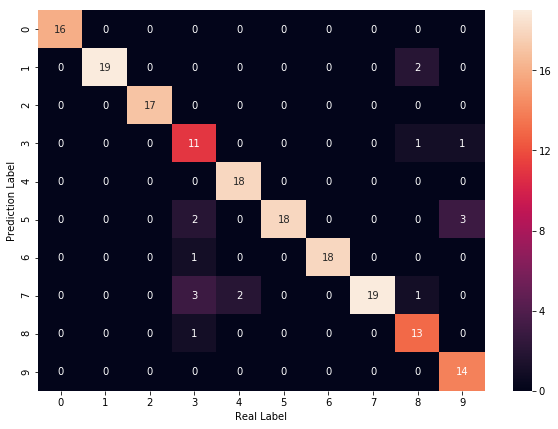

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 21., 17., 13., 18., 23., 19., 25., 14., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:159 index:[5] real:5
#1 min_error:154 index:[2] real:2
#2 min_error:157 index:[8] real:8
#3 min_error:53 index:[0] real:0
#4 min_error:104 index:[1] real:1
#5 min_error:91 index:[7] real:7
#6 min_error:65 index:[6] real:6
#7 min_error:121 index:[3] real:3
#8 min_error:83 index:[2] real:2
#9 min_error:114 index:[1] real:1
#10 min_error:158 index:[7] real:7
#11 min_error:157 index:[7] real:4
#12 min_error:92 index:[6] real:6
#13 min_error:132 index:[3] real:3
#14 min_error:109 index:[1] real:1
#15 min_error:152 index:[3] real:3
#16 min_error:171 index:[5] real:9
#17 min_error:108 index:[1] real:1
#18 min_error:126 index:[7] real:7
#19 min_error:48 index:[6] real:6
#20 min_error:158 index:[8] real:8
#21 min_error:86 index:[4] real:4
#22 min_error:113 index:[3] real:3
#23 min_error:125 index:[1] real:1
#24 min_error:91 index:[4] real:4
#25 min_error:66 index:[0] real:0
#26 min_error:108 index:[5] real:5
#27 min_error:104 index:[3] real:3
#28 min_error:121 index:[6] real:6
#29 

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8714 Total connections::8669


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9084724799010513
Avg Base Learner:0.7833137880663741
